In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import sys
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import pickle
from collections import OrderedDict
import copy
from scipy.sparse import csr_matrix
from scipy import io
import seaborn as sns
import joblib
# from base import *
from joblib import Parallel, delayed
import random
import time

## TEST NB

In [5]:
MNM_nb_folder = os.path.join('..', '..', '..', 'side_project', 'network_builder')
sys.path.append(MNM_nb_folder)
python_lib_folder = os.path.join('..', '..', 'pylib')
sys.path.append(python_lib_folder)

In [6]:
from MNMAPI import *
from MNM_mcnb import *
from mcDODE import *

In [7]:
origin_spc_folder = os.path.join('/home/lemma/Documents/MAC-POSTS/src/examples/mcDODE',
                                 'input_files_MckeesRocks_SPC')
cache_folder = os.path.join('cahce')

In [8]:
nb = MNM_network_builder()

In [9]:
nb.load_from_folder(origin_spc_folder)

In [10]:
nb.config

[DTA]
network_name = Snap_graph
unit_time = 5
total_interval = 5000
assign_frq = 180
start_assign_interval = 0
max_interval = 24
flow_scalar = 2
num_of_link = 16110
num_of_node = 6297
num_of_O = 283
num_of_D = 283
OD_pair = 80089
routing_type = Hybrid
adaptive_ratio = 0.5

[STAT]
rec_mode = LRn
rec_mode_para = 2
rec_folder = record
rec_volume = 0
volume_load_automatic_rec = 0
volume_record_automatic_rec = 0
rec_tt = 1
tt_load_automatic_rec = 0
tt_record_automatic_rec = 0

[FIXED]
path_file_name = path_table
num_path = 216720
choice_portion = Buffer
route_frq = 180

[ADAPTIVE]
route_frq = 180

In [38]:
(f_car, f_truck, loss) = pickle.load(open('28iteration.pickle', 'rb'))

In [39]:
path_len = len(nb.path_table.ID2path) * nb.config.config_dict['DTA']['max_interval']
# car_flow = np.random.rand(path_len) / 100
# truck_flow = np.zeros(path_len)

In [41]:
nb.update_demand_path2(f_car, f_truck)

In [59]:
pickle.dump((f_car * 2, f_truck * 2, loss), open('2_28iteration_double.pickle', 'wb'))

In [ ]:
f_car

In [58]:
(f_car * 2).sum()

553319.0132737316

In [42]:
nb.dump_to_folder(cache_folder)

## Load data

In [13]:
# nb_link_ID_list = list(map(lambda x: x.ID, nb.link_list))

In [14]:
# pickle.dump(nb_link_ID_list, open('nb_link_ID_list.pickle', 'wb'))

In [15]:
# [m_car, L_car, m_truck, L_truck, m_spd_car, m_spd_truck, observed_link_list] = pickle.load(open('mc_data.pickle', 'rb'))

In [16]:
# print len(observed_link_list)

2910


## TEST DTA

In [17]:
# ass_freq = nb.config.config_dict['DTA']['assign_frq']
# num_loading_interval = nb.config.config_dict['DTA']['max_interval'] * ass_freq

In [1]:
ass_freq = 180
num_loading_interval = 24 * 180
num_path = 216720

In [2]:
dta = mcdta_api()

NameError: name 'mcdta_api' is not defined

In [20]:
dta.initialize(cache_folder)

0L

In [21]:
dta.register_links(observed_link_list)

0L

In [22]:
# dta.register_paths(range(nb.config.config_dict['FIXED']['num_path']))
dta.register_paths(range(num_path))

0L

In [23]:
dta.install_cc()
dta.install_cc_tree()

0L

In [24]:
dta.run_whole()

0L

In [25]:
dta.get_car_link_tt(np.array([50, 100]))

array([[0.20571429, 0.20571429],
       [0.20571429, 0.20571429],
       [0.20571429, 0.20571429],
       ...,
       [0.16      , 0.16      ],
       [0.16      , 0.16      ],
       [0.8       , 0.8       ]])

In [26]:
tt = dta.get_car_dar_matrix(np.arange(0, num_loading_interval, ass_freq), 
                np.arange(0, num_loading_interval, ass_freq) + ass_freq)

In [27]:
tt

array([[2.18090e+04, 4.00000e+00, 1.98400e+03, 0.00000e+00, 5.00000e-01],
       [7.10530e+04, 1.00000e+00, 1.99600e+03, 0.00000e+00, 5.00000e-01],
       [2.06145e+05, 5.00000e+00, 1.99600e+03, 0.00000e+00, 5.00000e-01],
       ...,
       [1.10384e+05, 3.48000e+02, 1.02293e+06, 4.14000e+03, 5.00000e-01],
       [8.59500e+03, 3.49000e+02, 1.02293e+06, 4.14000e+03, 5.00000e-01],
       [1.42512e+05, 3.59000e+02, 1.02293e+06, 4.14000e+03, 5.00000e-01]])

## Test MCDODE lib

In [8]:
from mcDODE import *

In [8]:
[m_car, L_car, m_truck, L_truck, m_spd_car, m_spd_truck, observed_link_list] = pickle.load(open('mc_data.pickle', 'rb'))

In [9]:
data_dict = dict()
data_dict['car_count_agg_L_list'] = [L_car]
data_dict['truck_count_agg_L_list'] = [L_truck]
data_dict['car_link_flow'] = [m_car]
data_dict['truck_link_flow'] = [m_truck]
data_dict['car_link_tt'] = [m_spd_car]
data_dict['truck_link_tt'] = [m_spd_truck]

In [10]:
config = dict()
config['use_car_link_flow'] = True
config['use_car_link_tt'] = False
config['use_truck_link_flow'] = False
config['use_truck_link_tt'] = False
config['car_count_agg'] = True
config['truck_count_agg'] = True
config['link_car_flow_weight'] = 1
config['link_truck_flow_weight'] = 1
config['link_tt_weight'] = 1
config['num_data'] = 1
config['observed_links'] = observed_link_list
config['paths_list'] = range(nb.config.config_dict['FIXED']['num_path'])

In [11]:
dode = MCDODE(nb, config)

In [12]:
dode.add_data(data_dict)

In [ ]:
dode.estimate_path_flow(max_epoch = 100, step_size = 1e-4, 
                       car_init_scale = 0.01, truck_init_scale = 0.001,
                       store_folder = 'mcpath_storage')

Start iteration 1530501866.58
Running simulation 1530501866.58
Finish simulation 1530502012.34
Getting DAR 1530502012.34
Creating the coo matrix 1530503052.5
converting the csr 1530503052.5
finish converting 1530503052.51
Evaluating grad 1530503052.51
car link flow 1530503052.51
Getting Loss 1530503053.71
Epoch: 0 Loss: 25558.848276758774 1530503056.77
Start iteration 1530503060.46
Running simulation 1530503060.46


In [5]:
(f_car, f_truck) = pickle.load(open(os.path.join("mcpath_storage", '0iteration.pickle'), 'rb'))

In [23]:
(p, link_seq, path_seq) = pickle.load(open(os.path.join('test.pickle'), 'rb'))

In [25]:
p.shape

(591844,)

In [34]:
num_assign_interval = 24
num_e_path = 216720
num_e_link = 2910
start_time = time.time()
a = coo_matrix((p, (link_seq, path_seq)), 
                   shape=(num_assign_interval * num_e_link, num_assign_interval * num_e_path))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
a = a.tocsr()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00297808647156 seconds ---
--- 0.0230939388275 seconds ---


In [ ]:
csr_matrix

## Compare

In [24]:
from sklearn.metrics import r2_score

In [36]:
from scipy import stats
def r2(predictions, targets):
    y_bar = np.mean(targets)
    # diff = np.minimum(np.abs(predictions - targets), targets)
    diff = predictions - targets
    ss_e = np.sum(diff ** 2)
    ss_t = np.sum((targets) ** 2)
    return 1 - ss_e / ss_t

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmsn(predictions, targets):
    return np.sqrt(np.sum((predictions - targets) ** 2) * len(predictions)) / np.sum(targets)

In [43]:
[m_car, L_car, m_truck, L_truck, m_spd_car, m_spd_truck, observed_link_list] = pickle.load(
                    open('mc_data.pickle', 'rb'))
num_assign_interval = nb.config.config_dict['DTA']['max_interval']
ass_freq = nb.config.config_dict['DTA']['assign_frq']
num_loading_interval =  num_assign_interval * ass_freq

In [44]:
dta = mcdta_api()
dta.initialize(cache_folder)

0L

In [45]:
dta.register_links(observed_link_list)
dta.register_paths(range(nb.config.config_dict['FIXED']['num_path']))

0L

In [46]:
dta.install_cc()
dta.install_cc_tree()

0L

In [47]:
dta.run_whole()

0L

In [48]:
x_e = dta.get_link_car_inflow(np.arange(0, num_loading_interval, ass_freq), 
                  np.arange(0, num_loading_interval, ass_freq) + ass_freq).flatten(order = 'F')
x_e = L_car.dot(x_e)

In [49]:
x_e_nonana = x_e[~np.isnan(m_car)]
m_car_nonana = m_car[~np.isnan(m_car)]

In [50]:
print r2_score(m_car_nonana, x_e_nonana)
print r2(m_car_nonana, x_e_nonana)
print rsquared(m_car_nonana, x_e_nonana)
print rmse(m_car_nonana, x_e_nonana)
print rmsn(m_car_nonana, x_e_nonana)

0.5583261771300965
0.7340917609337589
0.7043243498163354
102.20201367478737
0.9006562714058927


In [51]:
x_e.shape

(69840,)

In [52]:
m_car.shape

(69840,)

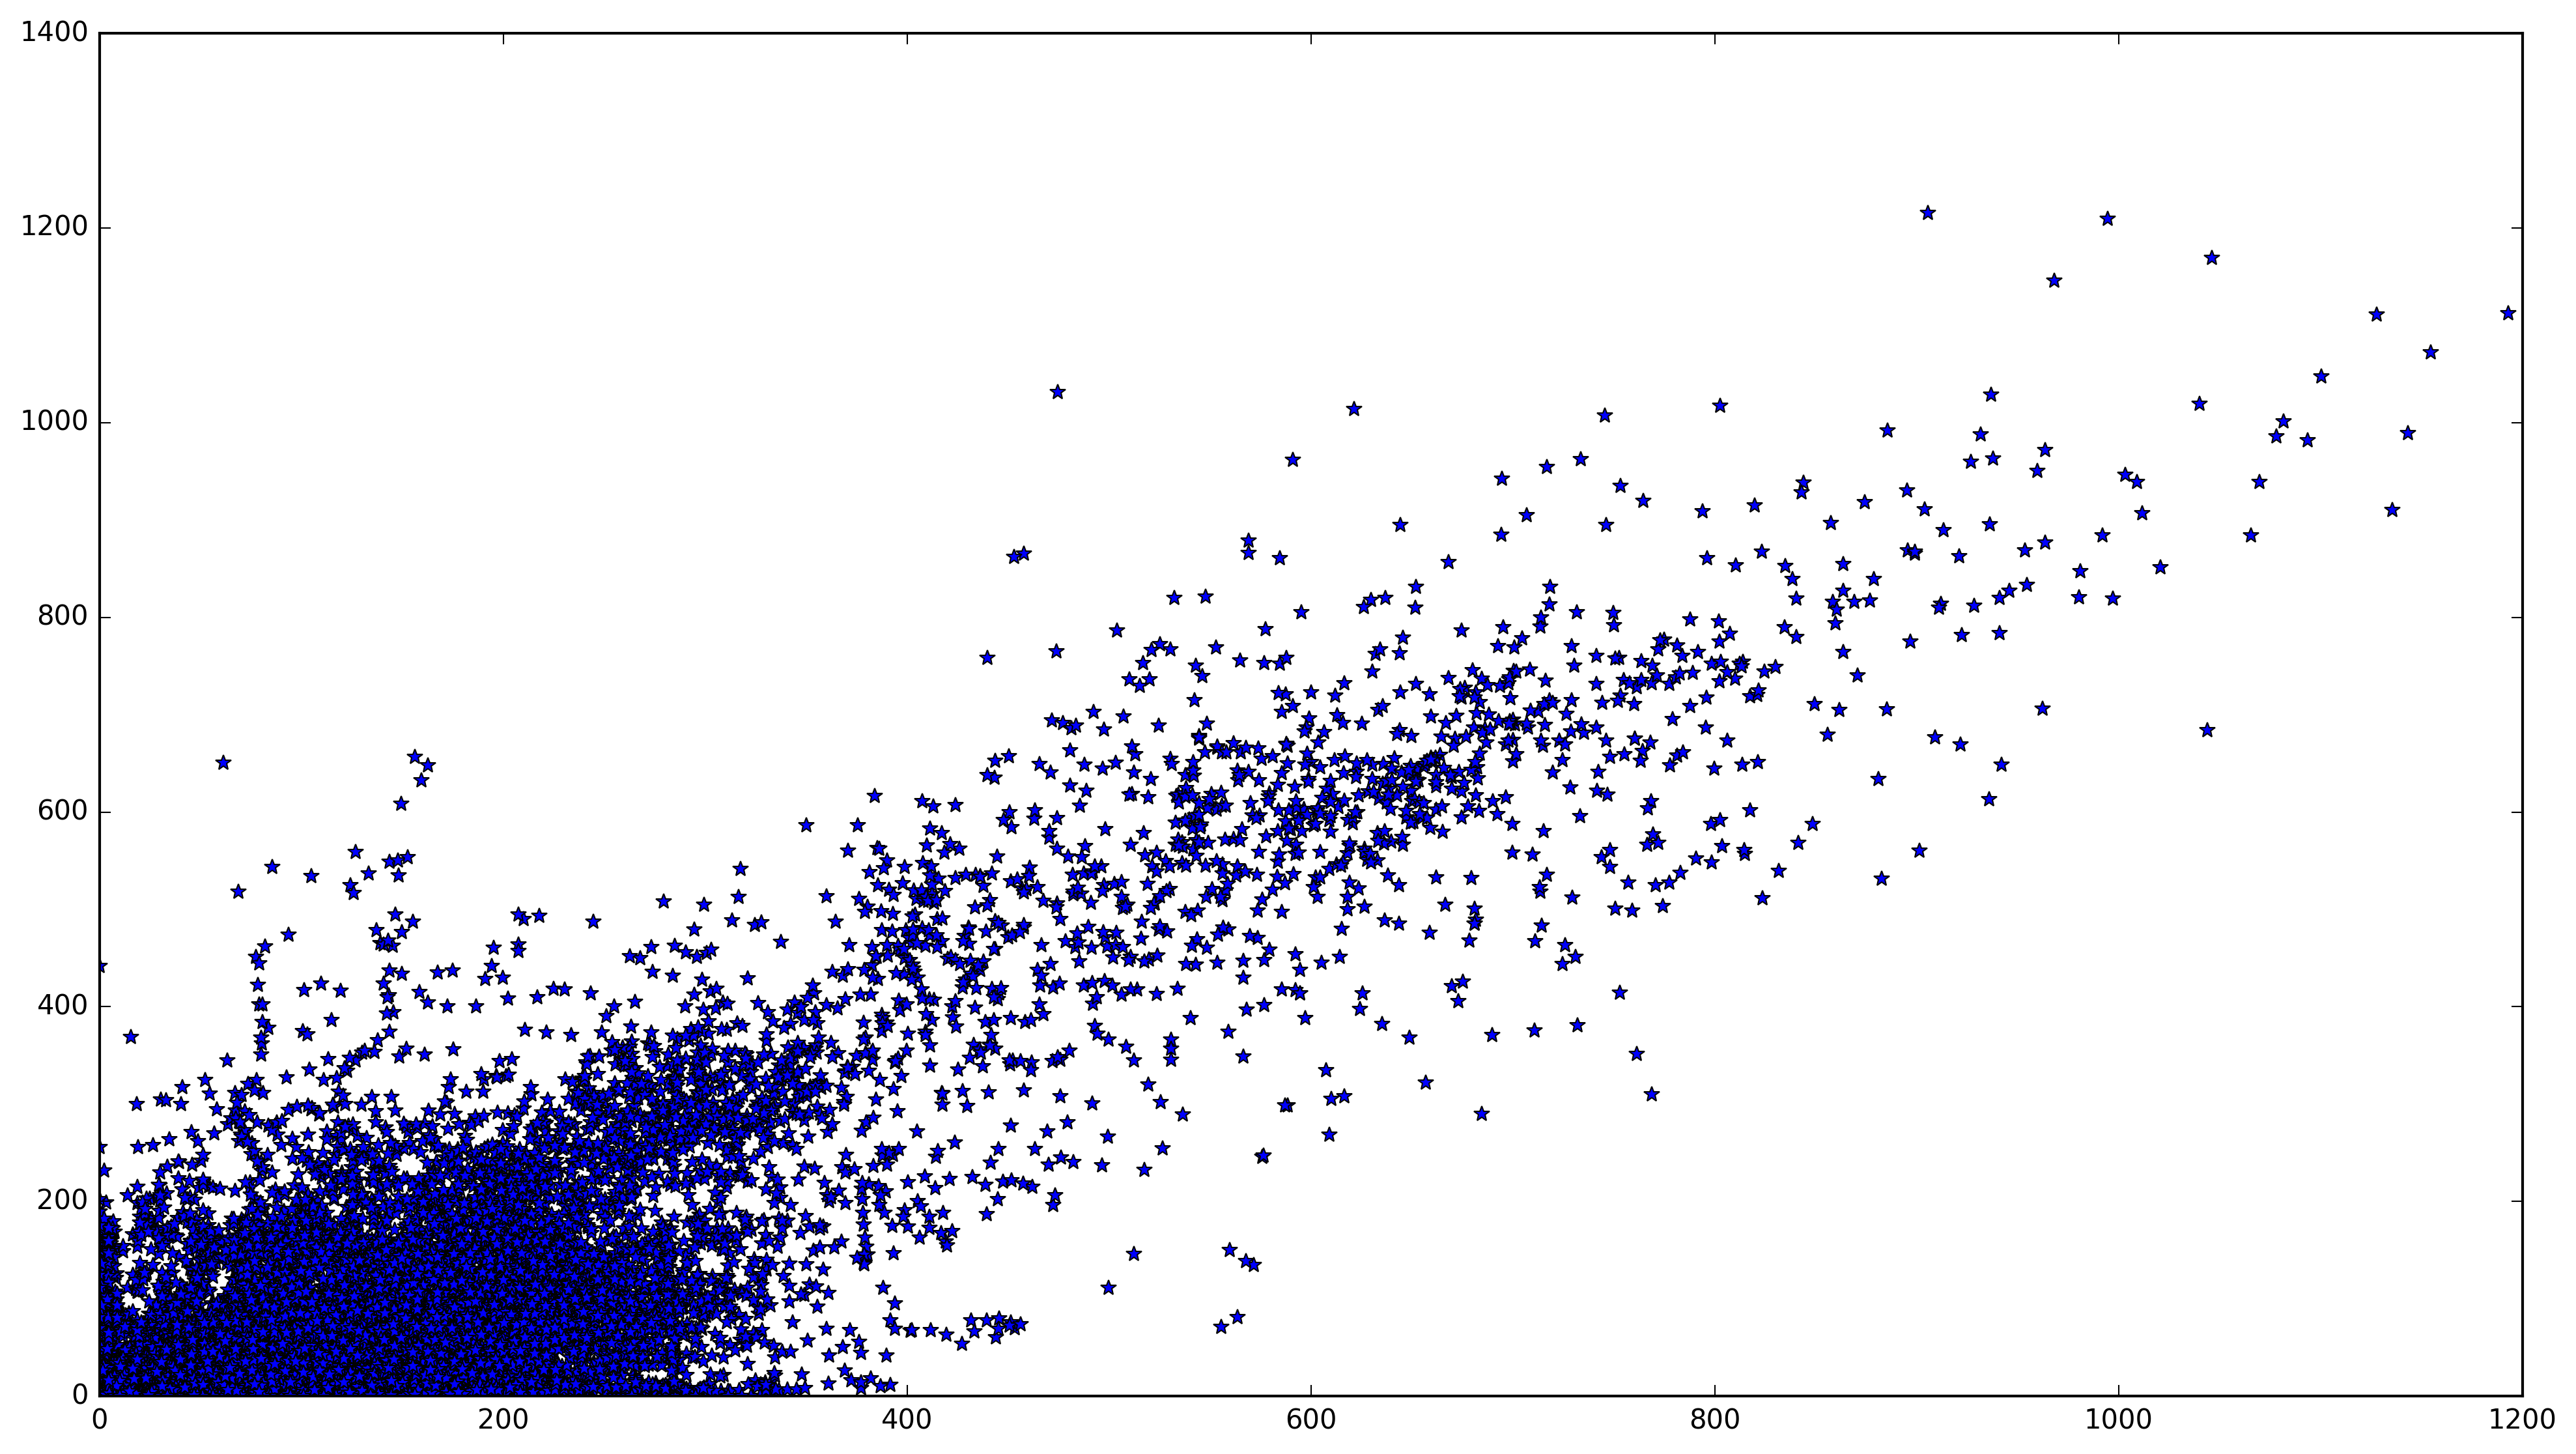

In [53]:
plt.figure(figsize = (16,9), dpi = 300)
plt.plot(m_car_nonana, x_e_nonana, '*')
plt.show()